In [1]:
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
from data import *

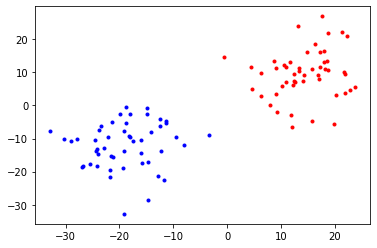

In [3]:
plt.plot(X[0,:], X[1,:], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')
plt.show()

In [4]:
lambd = cp.Variable(shape=(100,))
M = np.concatenate((X, -Y), axis=1)
D = M.T @ M + np.eye(M.shape[1]) * 1e-5

In [5]:
print(D.shape)
print(M.shape)
print(np.all(np.linalg.eigvals(D) >= 0))
print(np.linalg.eigvals(D))

(100, 100)
(50, 100)
True
[4.65163889e+05+0.00000000e+00j 1.79169939e+04+0.00000000e+00j
 1.69909549e+04+0.00000000e+00j 1.57166879e+04+0.00000000e+00j
 1.43997251e+04+0.00000000e+00j 1.35757548e+04+0.00000000e+00j
 1.30565373e+04+0.00000000e+00j 1.19165148e+04+0.00000000e+00j
 1.13666783e+04+0.00000000e+00j 9.88722032e+03+0.00000000e+00j
 9.26269188e+03+0.00000000e+00j 8.80752462e+03+0.00000000e+00j
 8.45444283e+03+0.00000000e+00j 7.72338328e+03+0.00000000e+00j
 7.41493888e+03+0.00000000e+00j 7.12076940e+03+0.00000000e+00j
 6.69014491e+03+0.00000000e+00j 6.07341083e+03+0.00000000e+00j
 6.01646665e+03+0.00000000e+00j 4.87088920e+03+0.00000000e+00j
 4.30635469e+03+0.00000000e+00j 4.14601749e+03+0.00000000e+00j
 3.77978747e+03+0.00000000e+00j 3.61164935e+03+0.00000000e+00j
 3.47551210e+03+0.00000000e+00j 2.61349331e+03+0.00000000e+00j
 2.78817208e+03+0.00000000e+00j 2.85608407e+03+0.00000000e+00j
 2.37172532e+03+0.00000000e+00j 2.23614107e+03+0.00000000e+00j
 2.12842523e+03+0.00000000e+0

In [8]:
C = 10
objective_soft = cp.Minimize(-cp.sum(lambd) + 0.5*cp.quad_form(lambd, D))
constraints_soft = [lambd >= 0, cp.sum(lambd[0:50] - lambd[50:100]) == 0, lambd <= C*1]
problem_soft = cp.Problem(objective_soft, constraints_soft)
problem_soft.solve(solver=cp.ECOS, verbose=False)

-0.00014755062348319702

In [9]:
lambd.value

array([2.18862921e-11, 3.71535135e-11, 1.68549955e-10, 2.36848833e-11,
       1.36875560e-05, 4.12927922e-11, 1.57296649e-11, 2.03863198e-11,
       2.96693307e-11, 1.88024527e-11, 1.62288137e-11, 2.53999067e-11,
       2.62248159e-11, 1.88582912e-09, 2.13483674e-11, 3.48035966e-11,
       2.11409732e-11, 1.07048554e-11, 7.31220353e-11, 1.92663118e-11,
       2.65020912e-11, 3.04020556e-10, 1.66583047e-11, 2.75672505e-11,
       4.70127892e-11, 3.49475934e-11, 3.20557502e-11, 5.94689109e-05,
       2.93493091e-05, 2.04485698e-11, 2.38757483e-11, 1.99472574e-05,
       4.45338431e-11, 2.94887974e-11, 2.04722866e-11, 2.51029143e-05,
       7.90983734e-11, 7.34215149e-11, 5.63805911e-11, 2.19082383e-11,
       5.35903471e-11, 2.26069732e-11, 3.63111458e-11, 1.01827277e-10,
       1.42902885e-11, 1.51580341e-11, 4.00418378e-11, 2.35914329e-11,
       1.94158639e-11, 2.29701673e-11, 1.88512794e-11, 1.58443515e-11,
       1.21770057e-11, 9.19020074e-11, 2.82768493e-10, 1.16964457e-10,
      

In [10]:
w = np.sum(np.multiply(lambd.value,M), axis=1)

In [11]:
index = np.argmax(lambd.value)

In [12]:
b = 1 - (w.T@M[:,index])[0,0]

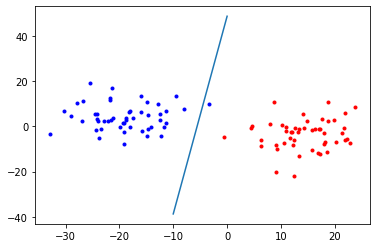

In [49]:
i1 = 0
i2 = 28
plt.plot(X[i1,:], X[i2,:], 'r.')
plt.plot(Y[i1,:], Y[i2,:], 'b.')
x = np.linspace(-10, 0, 100)
y = -(w[i1, 0]*x + b)/w[i2, 0]
plt.plot(x, y)
plt.show()